In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
import pickle
from ssm.stats import multivariate_normal_logpdf
from ssm.primitives import hmm_expected_states, hmm_sample
from pylds.lds_messages_interface import info_E_step
# from behavenet.fitting.utils import build_data_generator, create_tt_experiment
# from behavenet.fitting.utils import add_lab_defaults_to_parser, get_output_session_dir, get_expt_dir
# from test_tube import HyperOptArgumentParser
# from behavenet.fitting.decoding_grid_search import get_decoding_params

In [2]:
# def get_params(strategy, args):

#     parser = HyperOptArgumentParser(strategy)

#     # most important arguments
#     parser.add_argument('--search_type', type=str)  # grid_search, test
#     parser.add_argument('--lab_example', type=str)  # musall, steinmetz, datta
#     parser.add_argument('--tt_save_path', type=str)
#     parser.add_argument('--data_dir', type=str)
#     parser.add_argument('--model_type', default='ff', choices=['ff', 'ff-mv', 'linear', 'linear-mv', 'lstm'], type=str)
#     parser.add_argument('--model_class', default='neural-ae', choices=['neural-ae', 'neural-arhmm', 'ae-neural', 'arhmm-neural'], type=str)
#     parser.add_argument('--sessions_csv', default='', type=str, help='specify multiple sessions')

#     # arguments for computing resources (infer n_gpu_workers from visible gpus)
#     parser.add_argument('--tt_n_gpu_trials', default=1000, type=int)
#     parser.add_argument('--tt_n_cpu_trials', default=100000, type=int)
#     parser.add_argument('--tt_n_cpu_workers', default=5, type=int)
#     parser.add_argument('--mem_limit_gb', default=8.0, type=float)
#     parser.add_argument('--gpus_viz', default='0;1', type=str)

#     # add data generator arguments
#     parser.add_argument('--reg_list', default='none', type=str, choices=['none', 'arg', 'all'])
#     parser.add_argument('--subsample_regions', default='none', choices=['none', 'single', 'loo'])
#     parser.add_argument('--device', default='cuda', type=str)
#     parser.add_argument('--as_numpy', action='store_true', default=False)
#     parser.add_argument('--batch_load', action='store_true', default=False)
#     parser.add_argument('--rng_seed', default=0, type=int)

#     # add fitting arguments
#     parser.add_argument('--val_check_interval', default=1)

#     # get lab-specific arguments
#     namespace, extra = parser.parse_known_args(args)
#     add_lab_defaults_to_parser(parser, namespace.lab_example)
#     namespace, extra = parser.parse_known_args(args)  # ugly

#     # add regions to opt_list if desired
#     if namespace.reg_list == 'all':
#         parser.opt_list('--region', options=get_region_list(namespace), type=str, tunable=True)
#     elif namespace.reg_list == 'arg':
#         parser.add_argument('--region', default='all', type=str)
#     elif namespace.reg_list == 'none':  # TODO: fix this ambiguity
#         parser.add_argument('--region', default='all', type=str)
#     else:
#         raise ValueError(
#             '"%s" is not a valid region_list' % namespace.region_list)

#     get_decoding_params(namespace, parser)

#     return parser.parse_args(args)

In [3]:
# command_line_arg = '--search_type test --lab_example musall --animal mSM36 --session 05-Dec-2017 --tt_save_path /media/gssda/behavenet/results/ --data_dir /media/gssda/behavenet/data/  --model_type ff --model_class neural-ae --experiment_name grid_search --export_predictions --ae_experiment_name ae-dim-test --ae_model_type conv --n_ae_latents 8 --min_n_epochs 10 --max_n_epochs 500 --device cpu --n_lags 4 --l2_reg 1e-4 --n_hid_layers 3 --ae_multisession 0'
# hparams = get_params('grid_search', command_line_arg.split(' '))
# hparams = vars(hparams)
# hparams.pop('trials', False)
# hparams.pop('generate_trials', False)
# hparams.pop('optimize_parallel', False)
# hparams.pop('optimize_parallel_cpu', False)
# hparams.pop('optimize_parallel_gpu', False)
# hparams.pop('optimize_trials_parallel_gpu', False)

# # create test-tube experiment
# #hparams, sess_ids, exp = create_tt_experiment(hparams)
# hparams['session_dir'], sess_ids = get_output_session_dir(hparams)
# hparams['expt_dir'] = 'temp/'
# hparams['version'] = 0
# # build data generator
# ae_data_generator = build_data_generator(hparams, sess_ids)


In [4]:
# command_line_arg = '--search_type test --lab_example musall --animal mSM36 --session 05-Dec-2017 --tt_save_path /media/gssda/behavenet/results/ --data_dir /media/gssda/behavenet/data/ --model_type ff --model_class neural-arhmm --experiment_name grid_search --n_ae_latents 8 --arhmm_experiment_name grid_search --n_arhmm_states 8 --kappa 0 --noise_type gaussian --min_n_epochs 10 --max_n_epochs 500 --n_lags 4 --l2_reg 1e-4 --n_hid_layers 1 --arhmm_multisession 0 --device cpu'
# hparams = get_params('grid_search', command_line_arg.split(' '))
# hparams = vars(hparams)
# hparams.pop('trials', False)
# hparams.pop('generate_trials', False)
# hparams.pop('optimize_parallel', False)
# hparams.pop('optimize_parallel_cpu', False)
# hparams.pop('optimize_parallel_gpu', False)
# hparams.pop('optimize_trials_parallel_gpu', False)

# # create test-tube experiment
# #hparams, sess_ids, exp = create_tt_experiment(hparams)
# hparams['session_dir'], sess_ids = get_output_session_dir(hparams)
# hparams['expt_dir'] = 'temp/'
# hparams['version'] = 0
# # build data generator
# arhmm_data_generator = build_data_generator(hparams, sess_ids)


In [5]:
# N = 545
# K = 8

# ae_neural = [None for i in range(N)]
# ae_latents = [None for i in range(N)]
# arhmm_neural = [None for i in range(N)]
# arhmm_states = [None for i in range(N)]

# for ii in range(ae_data_generator.n_tot_batches['train']):
#     ae_data, _ = ae_data_generator.next_batch('train')
#     arhmm_data, _ = arhmm_data_generator.next_batch('train')
    
#     ae_neural[ae_data['batch_indx'].item()] = ae_data['neural'].cpu().detach().numpy().squeeze()
#     ae_latents[ae_data['batch_indx'].item()] = ae_data['ae_latents'].cpu().detach().numpy().squeeze()
    
#     arhmm_neural[arhmm_data['batch_indx'].item()] = arhmm_data['neural'].cpu().detach().numpy().squeeze()
#     arhmm_states[arhmm_data['batch_indx'].item()] = arhmm_data['arhmm_states'].cpu().detach().numpy().squeeze()
    
# neural = [v for v in ae_neural if v is not None]
# xs = [v for v in ae_latents if v is not None]
# zs = [v for v in arhmm_states if v is not None]


In [6]:
#np.savez('arhmm_decoding_data.npz',neural=neural, latents=xs, states=zs)

In [7]:
data = np.load('arhmm_decoding_data.npz')
neural = data['neural']
xs = data['latents']
zs = data['states']

In [8]:
# Have to lag the neural activity for each batch

W = 8
N = neural[0].shape[1]

ns_window = [_ for i in range(len(neural))]
for i in range(len(neural)):
    T = neural[i].shape[0]
    neural_pad = np.concatenate([np.zeros((W//2, N)), neural[i], np.zeros((W//2, N))])
    ns_window[i] = np.column_stack([neural_pad[w:T+w] for w in range(W)] )


In [28]:
ns_window_flat.shape

(10000, 2064)

In [9]:
# Concatente into sequences, take only part for now
T=10000
ns_window_flat =np.concatenate(ns_window,axis=0)[:T]
zs_flat = np.concatenate(zs,axis=0)[:T]
xs_flat = np.concatenate(xs,axis=0)[:T]

In [10]:
# Logistic regression

recog_z = LogisticRegression(solver='lbfgs', max_iter=1000)
recog_z.fit(ns_window_flat, zs_flat)


/Users/scott/miniconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Linear regression

recog_x = LinearRegression()
recog_x.fit(ns_window_flat, xs_flat)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Load in ARHMM model and get parameters
D=8
arhmm_model = pickle.load(open('best_val_model.pt','rb'))

K = arhmm_model.K
P = arhmm_model.transitions.transition_matrix
As = arhmm_model.observations.As
bs = arhmm_model.observations.bs
Qs = arhmm_model.observations.Sigmas

evals, evecs = np.linalg.eig(P.T)
perm = np.argsort(evals)[::-1]
evals, evecs = evals[perm], evecs[:, perm]
assert np.allclose(evals[0], 1.0)
if np.any(evecs[:,0] <= 0):
    evecs[:,0] = -1*evecs[:,0]
assert np.all(evecs[:,0] >= 0) 
pz_infty = np.real(evecs[:, 0] / evecs[:, 0].sum())

In [91]:
mu_infty = np.zeros((K, D))
Sigma_infty = np.zeros((K, D, D))
for k in range(K):
    mu_infty[k] = np.mean(xs_flat[zs_flat == k],axis=0)
#     Sigma_infty[k] = np.cov(training_ae[training_arhmm == k].T)
    Sigma_infty[k] = np.cov(xs_flat.T)
    
mu0 = np.zeros(D)
Sigma0 = np.eye(D)

In [135]:
# Use the information form.  It will generalize better to VI.
from pylds.lds_messages_interface import info_E_step

# Compute the info potentials for the initial condition
def _info_params(mu0, Sigma0, As, bs, Qs, q_mu_x, q_Sigma_x, Sigma_infty, mu_infty, Ez, z_sample):
    # parameter checking
    T, K = Ez.shape
    assert As.shape[0] == K and As.ndim == 3 and As.shape[1] == As.shape[2]
    D = As.shape[1]
    assert mu0.shape == (D,)
    assert Sigma0.shape == (D, D)
    assert bs.shape == (K, D)
    assert Qs.shape == (K, D, D)
    assert q_mu_x.shape == (T, D)
    assert q_Sigma_x.shape == (D, D)
    
    # Make pseudo-inputs (all ones) for bias terms
    inputs = np.ones((T, 1))
    
    # Convert initial distribution to info form
    # (ignore normalizing constants)
    J0 = np.linalg.inv(Sigma0)
    h0 = J0 @ mu0
    log_Z0 = 0

    # Info dynamics parameters
    J_pair_22 = np.linalg.inv(Qs)
    J_pair_21 = -np.matmul(np.linalg.inv(Qs), As)
    J_pair_11 = np.matmul(np.swapaxes(As, 1, 2), -J_pair_21)
    mBTQiA = np.matmul(np.swapaxes(bs[:, :, None], 1, 2), J_pair_21)
    BTQi = np.matmul(np.swapaxes(bs[:, :, None], 1, 2), J_pair_22)

    # Get expected sufficient statistics by integrating over z
    J_pair_22 = np.einsum('tk, kij -> tij', Ez[:-1], J_pair_22)
    J_pair_21 = np.einsum('tk, kij -> tij', Ez[:-1], J_pair_21)
    J_pair_11 = np.einsum('tk, kij -> tij', Ez[:-1], J_pair_11)
    mBTQiA = np.einsum('tk, kij -> tij', Ez[:-1], mBTQiA)
    BTQi = np.einsum('tk, kij -> tij', Ez[:-1], BTQi)
    h_pair_1 = np.einsum('tu, tud -> td', inputs[:-1], mBTQiA)
    h_pair_2 = np.einsum('tu, tud -> td', inputs[:-1], BTQi)
    log_Z_pair = np.zeros(T-1)

    # Info emission parameters
    J_obs = (np.linalg.inv(q_Sigma_x) - np.linalg.inv(Sigma_infty))[z_sample]
    h_recog = np.dot(np.linalg.inv(q_Sigma_x), q_mu_x.T).T
    h_infty = np.linalg.solve(Sigma_infty, mu_infty)[z_sample]
    h_obs = h_recog - h_infty
    log_Z_obs = np.zeros(T)
    
    return J0, h0, log_Z0, \
           J_pair_11, J_pair_21, J_pair_22, h_pair_1, h_pair_2, log_Z_pair, \
           J_obs, h_obs, log_Z_obs


In [136]:
n_iter = 100
t=5 # which batch to use


# Initialize q(z) with just the learned recognition potential
log_qz = recog_z.predict_log_proba(ns_window[t])
q_mu_x = recog_x.predict(ns_window[t])
q_Sigma_x = np.cov((xs[t] - q_mu_x).T)

z_potential = log_qz - np.log(pz_infty)
Ez, _, _ = hmm_expected_states(np.log(pz_infty), np.log(P)[None, :, :], z_potential)
z_sample = hmm_sample(np.log(pz_infty), np.log(P)[None, :, :], z_potential)

# compute the expected value of x given z and the observation potential
_, Ex, _, _ = info_E_step(
    *_info_params(mu0, Sigma0, As, bs, Qs, 
                  q_mu_x, q_Sigma_x, Sigma_infty, mu_infty, Ez, z_sample))

for i in range(n_iter):
    # Update z, now including the dynamics potential
    # TODO: Should really include the covariance of x in this update too
    z_dyn_potential = np.column_stack(
        [multivariate_normal_logpdf(Ex[1:], Ex[:-1] @ A.T + b, Q) 
         for A, b, Q in zip(As, bs, Qs)])
    z_dyn_potential = np.row_stack((np.zeros(K), z_dyn_potential))
    z_potential = log_qz - np.log(pz_infty) + z_dyn_potential
    Ez, _, _ = hmm_expected_states(np.log(pz_infty), np.log(P)[None, :, :], z_potential)
    z_sample = hmm_sample(np.log(pz_infty), np.log(P)[None, :, :], z_potential)
    
    # compute the expected value of x given z and the observation potential
    _, Ex, _, _ = info_E_step(
        *_info_params(mu0, Sigma0, As, bs, Qs, 
                      q_mu_x, q_Sigma_x, Sigma_infty, mu_infty, Ez, z_sample))

    #print(np.unique(Ez))
    print("MSE: ", np.mean((Ex[:,:D] - xs[t])**2))

MSE:  0.13206753742929617
MSE:  0.14852161397887265
MSE:  0.1662900109046125
MSE:  0.17678704396426081
MSE:  0.16904530143086444
MSE:  0.1695214289741429
MSE:  0.1785425747019652
MSE:  0.18695936153664267
MSE:  0.19251420805986166
MSE:  0.1908005979356448
MSE:  0.19288528249319292
MSE:  0.19119566705846822
MSE:  0.18249097094078928
MSE:  0.17880775021431644
MSE:  0.18496285545441302
MSE:  0.18554634104601225
MSE:  0.1874391810874471
MSE:  0.18091848287416193
MSE:  0.1821359684259248
MSE:  0.18318113707409225
MSE:  0.18523711060783388
MSE:  0.1894690854464223
MSE:  0.19409615718631193
MSE:  0.19257743025599064
MSE:  0.16248413480176785
MSE:  0.15542672811243652
MSE:  0.17041095513593008
MSE:  0.1737447459718454
MSE:  0.18207524288535115
MSE:  0.18353084147251966
MSE:  0.18354032476218066
MSE:  0.1826831254115011
MSE:  0.18983221451549534
MSE:  0.1907874952267991
MSE:  0.19302881387972934
MSE:  0.19300636224227025
MSE:  0.19628044794444977
MSE:  0.1798777109247621
MSE:  0.178621365096326

In [137]:
print(np.mean((q_mu_x - xs[t])**2))
print(np.mean((Ex - xs[t])**2))

0.10379436957319275
0.18022856808314816


In [138]:
sampled_observations = np.zeros((len(zs[t]),D))
for i_t in range(len(zs[t])):
    sampled_observations[i_t] = arhmm_model.observations.sample_x(np.argmax(Ez,axis=1)[i_t], sampled_observations[:i_t], input=[0], with_noise=False)
    
    

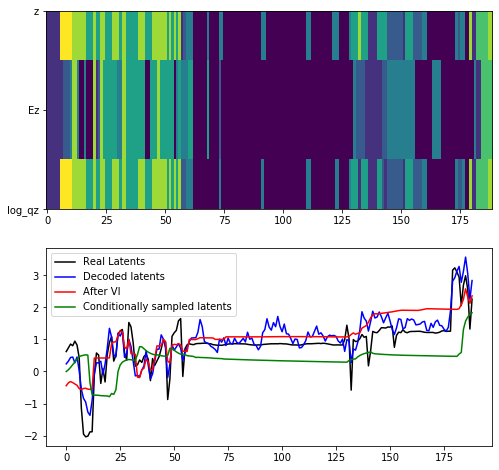

In [139]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
zplot = np.row_stack((zs[t],
                      np.argmax(Ez, axis=1),
                      np.argmax(log_qz, axis=1),
                      ))
plt.imshow(zplot, aspect="auto")
plt.yticks([0, 1, 2], ["z", "Ez", "log_qz"])

plt.subplot(212)
plt.plot(xs[t][:,0],'k')
plt.plot(q_mu_x[:,0],'b')
plt.plot(Ex[:,0],'r')
plt.plot(sampled_observations[:,0],'g')
plt.legend(['Real Latents', 'Decoded latents', 'After VI', 'Conditionally sampled latents'])